In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Number of taps in boxcar filter (explore a range)
num_taps_range = np.array([2, 4, 8, 12])

# Frequency vector
freq_resolution = np.pi / 512. # play around with this parameter   
omega = np.arange(0, np.pi + freq_resolution, freq_resolution)

In [3]:
# Function to compute magnitude response for a boxcar filter with K taps
def compute_mag_resp(freq, num_taps):
    
    
    # Frequency response
    freq_resp_real = np.zeros((len(freq), ))
    freq_resp_imag = np.zeros((len(freq), ))
    
    # Freq resp = sum_k (1/K) exp(-jwk) [Discrete-time Fourier transform]
    for k in np.arange(num_taps):
        freq_resp_real += (1 / num_taps) * np.cos(freq * k)
        freq_resp_imag += (1 / num_taps) * np.sin(-freq * k)
        
    # Mag resp = |Freq resp|
    mag_resp = np.sqrt(freq_resp_real ** 2. + freq_resp_imag ** 2.)
    
    return mag_resp
    

(-70.0, 0.0)

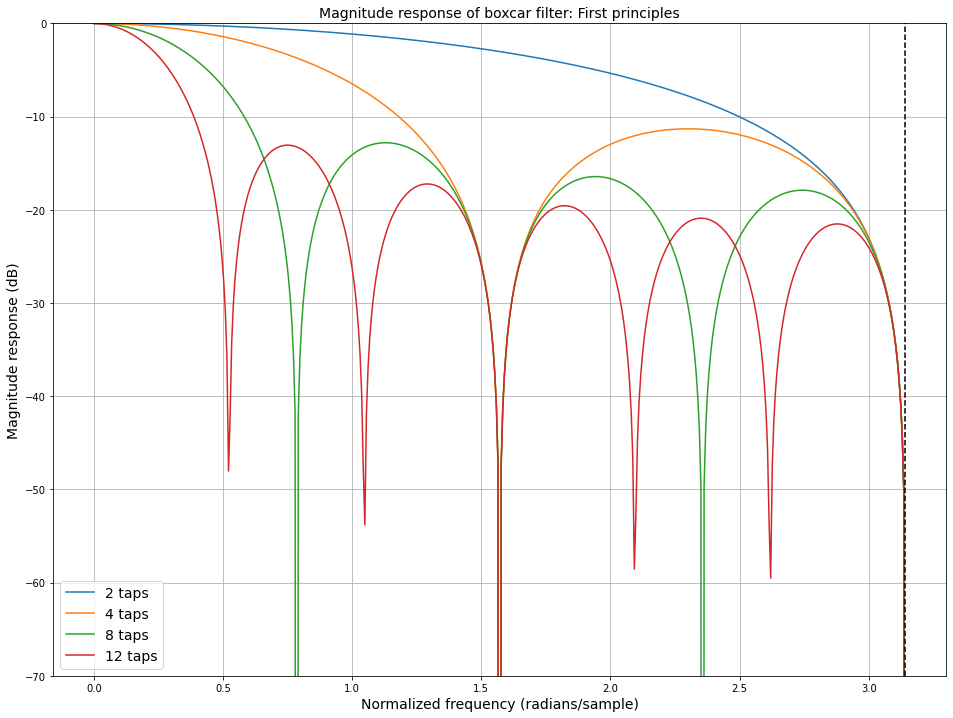

In [4]:
# Loop over num_taps_range and plot frequency response in each case
plt.figure(figsize=(16, 12))

for num_taps in num_taps_range:
    mag_resp = compute_mag_resp(omega, num_taps)
    plt.plot(omega, 20 * np.log10(mag_resp), label=str(num_taps) + ' taps')
   
plt.grid()
plt.axvline(np.pi, linestyle='--', color='k')
plt.xlabel('Normalized frequency (radians/sample)', fontsize=14)
plt.ylabel('Magnitude response (dB)', fontsize=14)
plt.legend(fontsize=14)
plt.title('Magnitude response of boxcar filter: First principles', fontsize=14)
plt.ylim([-70, 0])



/var/folders/0y/78n487vx7039sf9bzrlx_d680000gn/T/ipykernel_76818/3478159164.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), label=str(num_taps) + ' taps')


(-70.0, 0.0)

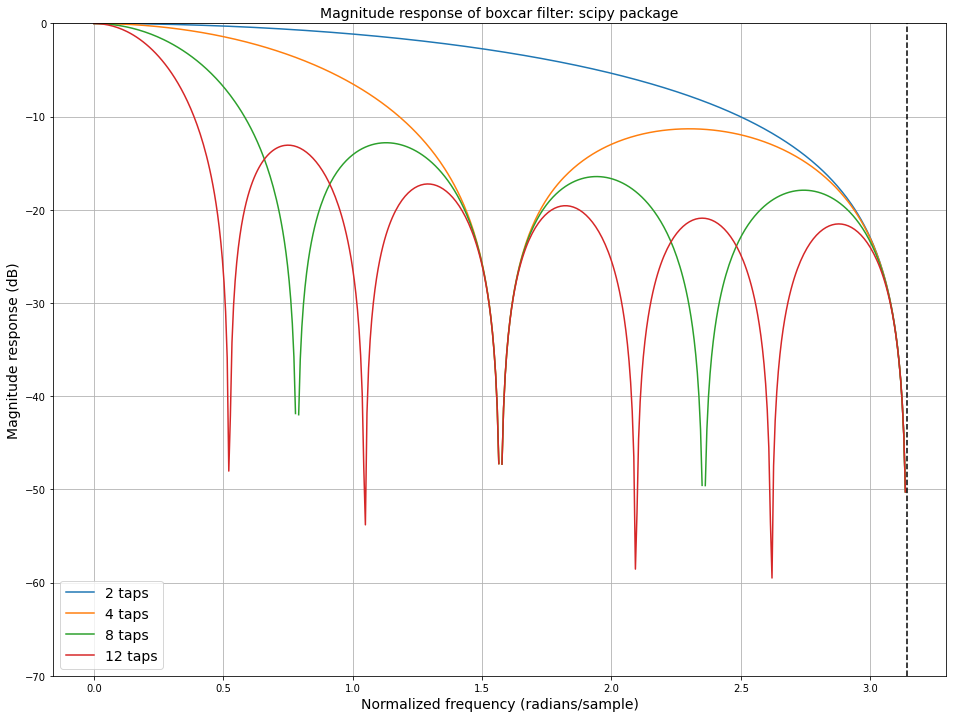

In [5]:
# Use scipy package to generate the same result
# Loop over num_taps_range and plot frequency response in each case
plt.figure(figsize=(16, 12))

for num_taps in num_taps_range:
    w, h = signal.freqz(np.ones(num_taps) / num_taps)
    plt.plot(w, 20 * np.log10(np.abs(h)), label=str(num_taps) + ' taps')
    
plt.grid()
plt.axvline(np.pi, linestyle='--', color='k')
plt.xlabel('Normalized frequency (radians/sample)', fontsize=14)
plt.ylabel('Magnitude response (dB)', fontsize=14)
plt.legend(fontsize=14)
plt.title('Magnitude response of boxcar filter: scipy package', fontsize=14)
plt.ylim([-70, 0])

